<h1 style="color:purple" >RFM - Recency Frequency Monetary</h1>

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

- **R**ecency – How recently did the customer purchase?
- **F**requency – How often do they purchase?
- **M**onetary Value – How much do they spend?

Customer purchases may be represented by a table with columns for the customer name, date of purchase and purchase value. One approach to RFM is to assign a score for each dimension on a scale from 1 to 10. The maximum score represents the preferred behavior and a formula could be used to calculate the three scores for each customer. For example, a service-based business could use these calculations:

- **Recency** = the maximum of "10 – the number of months that have passed since the customer last purchased" and 1
- **Frequency** = the maximum of "the number of purchases by the customer in the last 12 months (with a limit of 10)" and 1
- **Monetary** = the highest value of all purchases by the customer expressed as a multiple of some benchmark value

Alternatively, categories can be defined for each attribute. For instance, Recency might be broken into three categories: customers with purchases within the last 90 days; between 91 and 365 days; and longer than 365 days. Such categories may be derived from business rules or using data mining techniques to find meaningful breaks.

Once each of the attributes has appropriate categories defined, segments are created from the intersection of the values. If there were three categories for each attribute, then the resulting matrix would have twenty-seven possible combinations (one well-known commercial approach uses five bins per attributes, which yields 125 segments). Companies may also decide to collapse certain subsegments, if the gradations appear too small to be useful. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value). Identifying the most
valuable RFM segments can capitalize on chance relationships in the data used for this analysis. For this reason, it is highly recommended that another set of data be used to validate the results of the RFM segmentation process. Advocates of this technique point out that it has the virtue of simplicity: no specialized statistical software is required, and the results are readily understood by business people. In the absence of other targeting techniques, it can provide a lift in response rates for promotions.


In [92]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


In [65]:
df2 = pd.read_excel('/content/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df1 = pd.read_excel('/content/online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [61]:
df1.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


In [70]:
df2.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


In [71]:
# Remove Missing Values
df1.dropna(inplace = True)
df2.dropna(inplace = True)

In [72]:
# 2009-2010
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Quantity,417534.0,12.758815,-9360.0,-2.0,1.0,1.0,1.0,4.0,24.0,36.0,144.0,19152.0,101.220424
InvoiceDate,417534,2010-07-01 01:12:19.787609856,2009-12-01 07:45:00,2009-12-02 15:04:00,2009-12-13 12:42:00,2010-01-18 14:49:00,2010-03-05 09:09:00,2010-07-08 19:12:00,2010-11-17 17:16:00,2010-11-28 13:43:00,2010-12-07 14:41:00,2010-12-09 20:01:00,NaN
Price,417534.0,3.887547,0.0,0.29,0.42,0.65,0.85,1.95,6.75,8.5,14.95,25111.09,71.131797
Customer ID,417534.0,15360.645478,12346.0,12435.0,12725.0,13042.0,13624.0,15311.0,17706.0,17913.0,18196.0,18287.0,1680.811316


In [73]:
# 2010-2011

df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Quantity,406830.0,12.061276,-80995.0,-2.0,1.0,1.0,1.0,5.0,24.0,36.0,120.0,80995.0,248.693065
InvoiceDate,406830,2011-07-10 16:31:30.127424512,2010-12-01 08:26:00,2010-12-03 10:26:00,2010-12-14 14:15:00,2011-01-21 13:07:00,2011-03-16 08:31:00,2011-07-31 11:48:00,2011-11-20 16:07:00,2011-11-29 15:24:00,2011-12-07 14:01:00,2011-12-09 12:50:00,NaN
Price,406830.0,3.460507,0.0,0.21,0.42,0.55,0.85,1.95,6.75,8.5,15.0,38970.0,69.31508
Customer ID,406830.0,15287.68416,12346.0,12415.0,12626.0,12876.0,13536.0,15152.0,17719.0,17905.0,18212.0,18287.0,1713.603074


In [74]:
# Remove negative values!

df1 = df1[~df1["Invoice"].str.contains("C", na = False)]
df2 = df2[~df2["Invoice"].str.contains("C", na = False)]

In [22]:
df['Price'] = df['Price'].astype(str).str.replace(",", ".")
df['Price'] = df['Price'].astype('float64')

In [75]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Quantity,407695.0,13.586686,1.0,1.0,1.0,1.0,2.0,5.0,24.0,36.0,144.0,19152.0,96.842229
InvoiceDate,407695,2010-07-01 10:10:10.782177792,2009-12-01 07:45:00,2009-12-02 15:10:00,2009-12-13 13:27:00,2010-01-19 11:01:00,2010-03-05 11:31:00,2010-07-09 15:46:00,2010-11-18 10:37:00,2010-11-28 13:53:00,2010-12-07 14:31:00,2010-12-09 20:01:00,NaN
Price,407695.0,3.294188,0.0,0.29,0.42,0.65,0.85,1.95,6.75,8.5,14.95,10953.5,34.756655
Customer ID,407695.0,15368.504107,12346.0,12435.0,12731.0,13044.0,13635.0,15321.0,17706.0,17913.0,18196.0,18287.0,1679.7957


In [76]:
df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Quantity,397925.0,13.021793,1.0,1.0,1.0,1.0,2.0,6.0,24.0,36.0,120.0,80995.0,180.419984
InvoiceDate,397925,2011-07-10 23:44:09.817126400,2010-12-01 08:26:00,2010-12-03 10:26:00,2010-12-14 14:15:00,2011-01-21 14:39:00,2011-03-16 12:12:00,2011-07-31 14:39:00,2011-11-21 09:02:00,2011-11-29 15:24:00,2011-12-07 14:01:00,2011-12-09 12:50:00,NaN
Price,397925.0,3.116212,0.0,0.21,0.42,0.55,0.85,1.95,6.35,8.5,14.95,8142.75,22.096773
Customer ID,397925.0,15294.308601,12346.0,12415.0,12627.0,12883.0,13552.0,15159.0,17725.0,17912.0,18211.0,18287.0,1713.172738


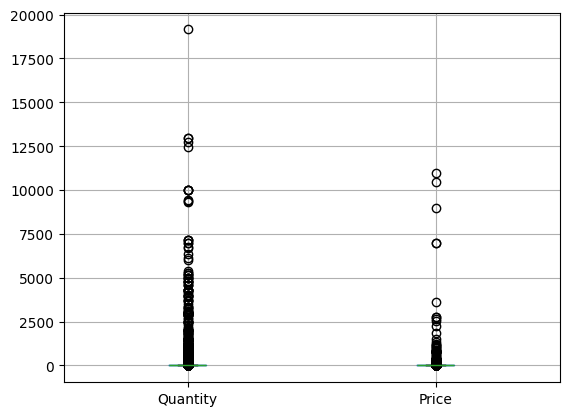

In [77]:
df1[["Quantity", "Price"]].boxplot();

<Axes: >

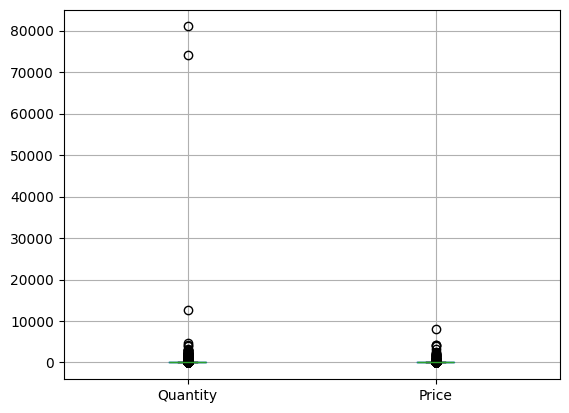

In [78]:
df2[["Quantity", "Price"]].boxplot()

# Recency

In [79]:
print("2009-2010: Min Date", df1["InvoiceDate"].min(), "Max Date", df1["InvoiceDate"].max())
print("2010-2011: Min Date", df2["InvoiceDate"].min(), "Max Date", df2["InvoiceDate"].max())

2009-2010: Min Date 2009-12-01 07:45:00 Max Date 2010-12-09 20:01:00
2010-2011: Min Date 2010-12-01 08:26:00 Max Date 2011-12-09 12:50:00


In [81]:
import datetime as dt
recency1 = (dt.datetime(2010, 12, 9) - df1.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
recency2 = (dt.datetime(2011, 12, 9) - df2.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})

recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)
recency2["Recency"] = recency2["Recency"].apply(lambda x: x.days)

recency2.head()

,Recency
Customer ID,
12346.0,324
12347.0,1
12348.0,74
12349.0,17
12350.0,309


# Frequency

In [82]:
freq1 = df1.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
freq2 = df2.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})

freq2

,Frequency
Customer ID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,2


# Monetary

In [83]:
df1["TotalPrice"] = df1["Quantity"] * df1["Price"]
df2["TotalPrice"] = df2["Quantity"] * df2["Price"]

monetary1 = df1.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})
monetary2 = df2.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})

monetary2.head()

<ipython-input-83-19302c3b0fb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["TotalPrice"] = df2["Quantity"] * df2["Price"]


,Monetary
Customer ID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [84]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)
rfm2 = pd.concat([recency2, freq2, monetary2],  axis=1)

rfm2.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,324,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,17,1,1757.55
12350.0,309,1,334.40


# Create RFM Score

In [85]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm2["RecencyScore"] = pd.qcut(rfm2["Recency"], 5, labels = [5, 4 , 3, 2, 1])

rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm2["FrequencyScore"]= pd.qcut(rfm2["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm2["MonetaryScore"] = pd.qcut(rfm2['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346.0,324,1,77183.60,1,1,5
12347.0,1,7,4310.00,5,5,5
12348.0,74,4,1797.24,2,4,4
12349.0,17,1,1757.55,4,1,4
12350.0,309,1,334.40,1,1,2


In [86]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) +
                     rfm1['FrequencyScore'].astype(str) +
                     rfm1['MonetaryScore'].astype(str))

rfm2["RFM_SCORE"] = (rfm2['RecencyScore'].astype(str) +
                     rfm2['FrequencyScore'].astype(str) +
                     rfm2['MonetaryScore'].astype(str))

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.0,324,1,77183.60,1,1,5,115
12347.0,1,7,4310.00,5,5,5,555
12348.0,74,4,1797.24,2,4,4,244
12349.0,17,1,1757.55,4,1,4,414
12350.0,309,1,334.40,1,1,2,112


In [87]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)
rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)

rfm2['Segment'] = rfm2['RecencyScore'].astype(str) + rfm2['FrequencyScore'].astype(str)
rfm2['Segment'] = rfm2['Segment'].replace(seg_map, regex=True)

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,324,1,77183.60,1,1,5,115,Hibernating
12347.0,1,7,4310.00,5,5,5,555,Champions
12348.0,74,4,1797.24,2,4,4,244,At Risk
12349.0,17,1,1757.55,4,1,4,414,Promising
12350.0,309,1,334.40,1,1,2,112,Hibernating


# Summary Statistics

In [88]:
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.851312,51.0,343,10.259985,1.201166,1.0,343,0.401458,442.266851,317.760,343,417.303449
At Risk,149.937807,128.0,611,69.978119,3.070376,3.0,611,1.092428,1188.207056,760.190,611,1844.174551
Can't Loose,121.717949,106.5,78,49.724409,9.038462,7.5,78,5.782738,4072.967051,2316.485,78,5275.397061
Champions,5.119155,5.0,663,4.619934,12.499246,8.0,663,17.189180,6852.264167,2508.320,663,21556.377144
Hibernating,212.309055,211.0,1016,89.780306,1.126969,1.0,1016,0.333102,401.982150,250.155,1016,775.076212
Loyal Customers,34.275908,29.0,743,16.064746,6.816958,5.0,743,4.376349,2743.484342,1818.710,743,3255.108992
Need Attention,51.212560,51.0,207,9.838168,2.454106,2.0,207,0.499096,1058.788068,730.470,207,1190.255349
New Customers,6.580000,6.5,50,4.309884,1.000000,1.0,50,0.000000,386.199200,258.825,50,493.321262
Potential Loyalists,16.773256,17.0,516,9.730991,2.023256,2.0,516,0.696344,729.164806,523.660,516,837.546248


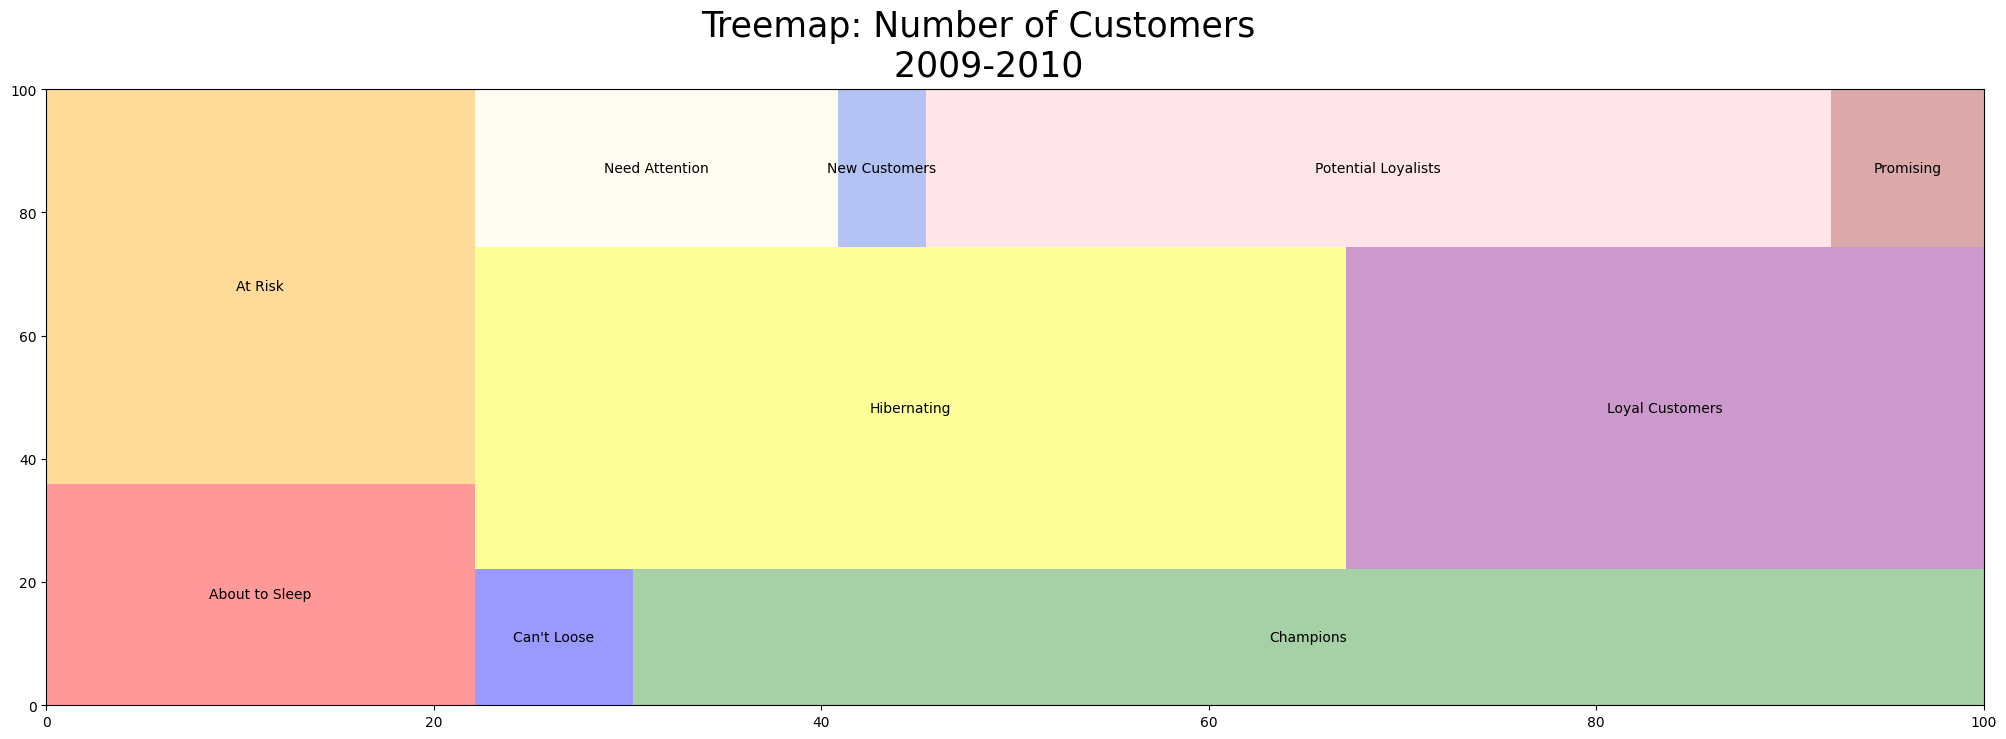

In [100]:
plt.figure(figsize = (25,8))
squarify.plot(sizes=rfmStats1.Recency_count, label=rfmStats1.index,
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
plt.suptitle("Treemap: Number of Customers \n 2009-2010", fontsize=25);

# Visualize

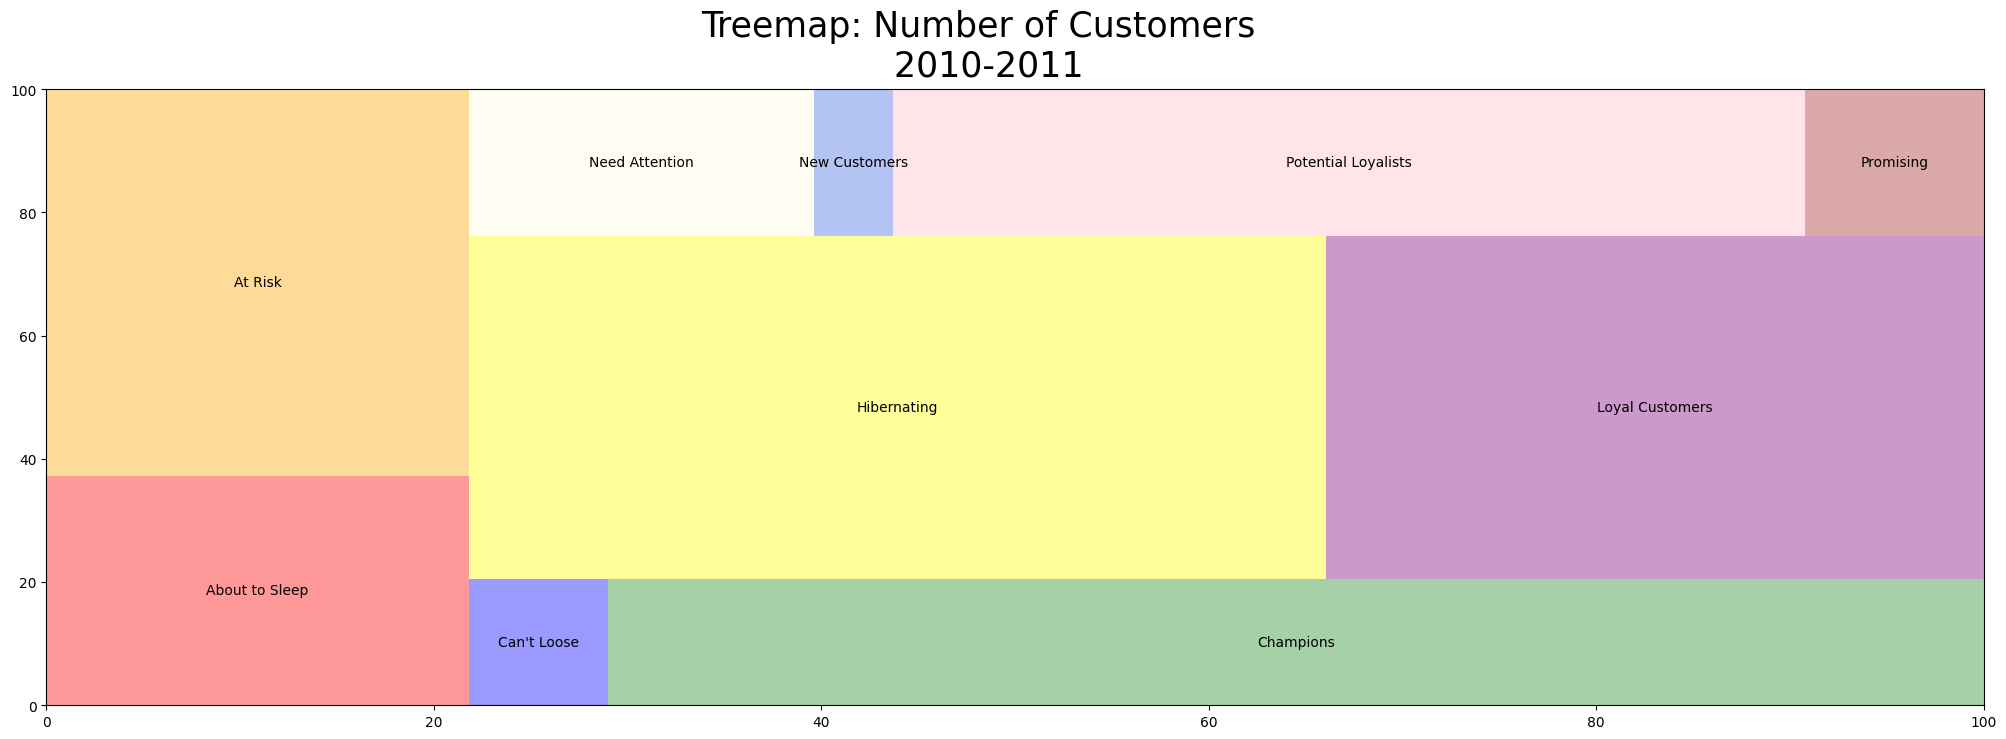

In [101]:
plt.figure(figsize = (25,8))
squarify.plot(sizes=rfmStats2.Recency_count, label=rfmStats2.index,
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
plt.suptitle("Treemap: Number of Customers \n 2010-2011", fontsize=25);

In [103]:
from sklearn.preprocessing import StandardScaler

# Select only the numerical columns for scaling
numerical_cols = ['Recency', 'Frequency', 'Monetary']
rfm2_numerical = rfm2[numerical_cols]

# Initialize and apply StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(rfm2_numerical)

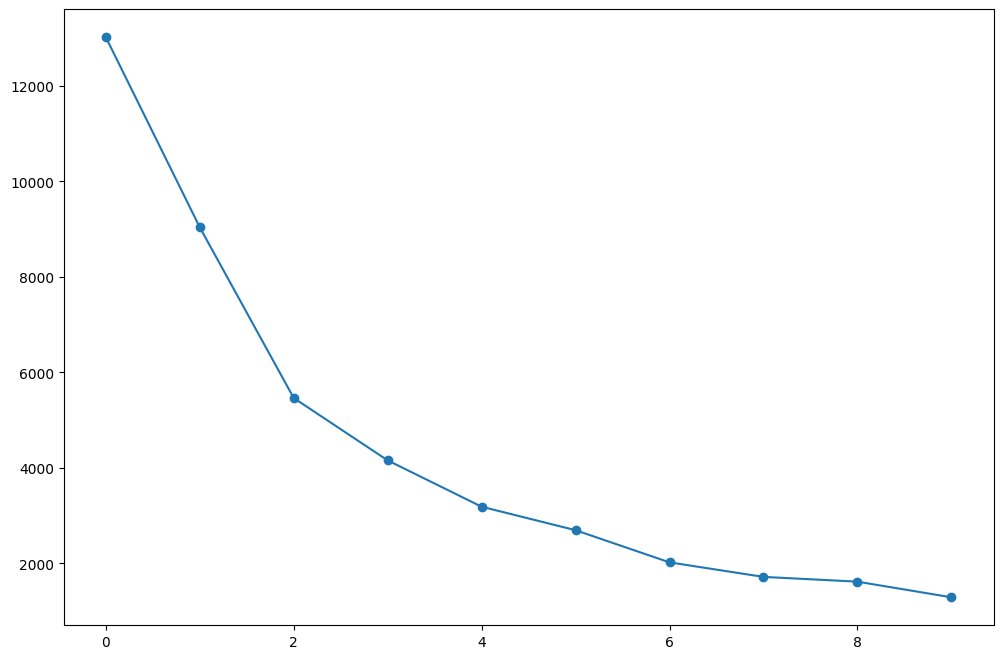

In [104]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")

In [105]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
rfm2_numerical["Clusters"]=(kmeans.labels_+1)

<ipython-input-105-2d7efd08ee17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2_numerical["Clusters"]=(kmeans.labels_+1)


In [106]:
rfm2_numerical

,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
12346.0,324,1,77183.60,2
12347.0,1,7,4310.00,1
12348.0,74,4,1797.24,1
12349.0,17,1,1757.55,1
12350.0,309,1,334.40,2
...,...,...,...,...
18280.0,276,1,180.60,2
18281.0,179,1,80.82,2
18282.0,6,2,178.05,1


In [107]:
final = rfm2_numerical.groupby("Clusters")[["Recency", "Frequency", "Monetary"]].mean()
final

,Recency,Frequency,Monetary
Clusters,,,
1,39.567718,4.826221,2010.943427
2,244.722273,1.578368,630.244877
3,5.357143,79.571429,122888.407143


In [108]:
def func(row):
    if row["Clusters"]==1:
        return 'Whales'
    elif row["Clusters"]==2:
        return 'Lapsed Cx'
    else:
        return 'Avg. Cx'

In [109]:
rfm2_numerical['group'] = RFM.apply(func, axis=1)
rfm2_numerical

<ipython-input-109-8a71ed33839d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2_numerical['group'] = RFM.apply(func, axis=1)


,Recency,Frequency,Monetary,Clusters,group
Customer ID,,,,,
12346.0,324,1,77183.60,2,Whales
12347.0,1,7,4310.00,1,Lapsed Cx
12348.0,74,4,1797.24,1,Lapsed Cx
12349.0,17,1,1757.55,1,Lapsed Cx
12350.0,309,1,334.40,2,Whales
...,...,...,...,...,...
18280.0,276,1,180.60,2,Whales
18281.0,179,1,80.82,2,Whales
18282.0,6,2,178.05,1,Lapsed Cx


In [110]:
result = rfm2_numerical.group.value_counts(normalize=True)*100

result

,proportion
group,
Lapsed Cx,74.671583
Whales,25.005762
Avg. Cx,0.322655


<Axes: ylabel='group'>

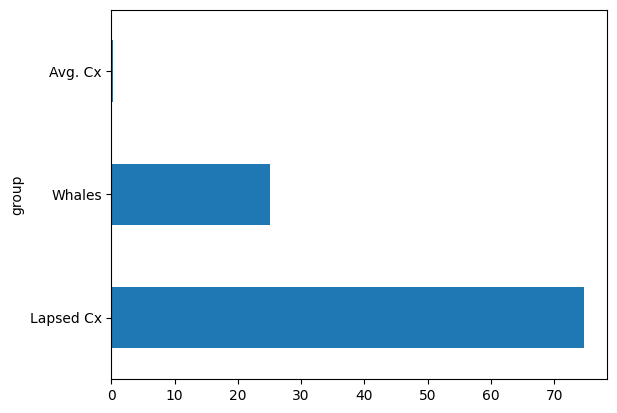

In [139]:
result.plot(kind="barh")